In [1]:
import numpy as np 
import pandas as pd 
import re

# Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots


from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
df = pd.read_csv('Corona_NLP_train.csv',encoding ='latin1',error_bad_lines=False)
test = pd.read_csv('Corona_NLP_test.csv',encoding ='latin1',error_bad_lines=False)

In [3]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [4]:
data = df[['OriginalTweet']]
data['index'] = data.index
documents = data

In [5]:
print(len(documents))
print(documents[:5])

41157
                                       OriginalTweet  index
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...      0
1  advice Talk to your neighbours family to excha...      1
2  Coronavirus Australia: Woolworths to give elde...      2
3  My food stock is not the only one which is emp...      3
4  Me, ready to go at supermarket during the #COV...      4


In [6]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

C:\Users\berni\Nouveau dossier (4)\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\berni\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Nettoyage de la base

In [7]:
# suppression des Urls et codes HTML
def remove_urls(df):
    url_remove = re.compile(r'https?://\S+|www\.\S+')
    return url_remove.sub(r'', df)
df['text_new']=df['OriginalTweet'].apply(lambda x:remove_urls(x))

def remove_html(df):
    html=re.compile(r'<.*?>')
    return html.sub(r'',df)
df['OriginalTweet']=df['text_new'].apply(lambda x:remove_html(x))

In [8]:
# Suppression des Hastags 
def remove_mention(x):
    text=re.sub(r'@\w+','',x)
    return text
df['text_new']=df['OriginalTweet'].apply(lambda x:remove_mention(x))
def remove_hash(x):
    text=re.sub(r'#\w+','',x)
    return text
df['OriginalTweet']=df['text_new'].apply(lambda x:remove_hash(x))

In [9]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [10]:
documents[documents['index'] == 4310].values[0][0]

'Not a lot of food left in the supermarket tonight.  \r\r\n\r\r\nNo eggs, meat, bread, milk, pasta or rice. Plus, of course, no toilet paper or disinfectant. \r\r\nSome frozen food, fruit and plenty of snacks. (Chips, chocolates etc) \r\r\n\r\r\n#sydney #coronavirus #COVID19au https://t.co/EcZg6KTV5q'

In [11]:
stemmer = SnowballStemmer('english')
doc_sample = documents[documents['index'] == 4310].values[0][0]

print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['Not', 'a', 'lot', 'of', 'food', 'left', 'in', 'the', 'supermarket', 'tonight.', '', '\r\r\n\r\r\nNo', 'eggs,', 'meat,', 'bread,', 'milk,', 'pasta', 'or', 'rice.', 'Plus,', 'of', 'course,', 'no', 'toilet', 'paper', 'or', 'disinfectant.', '\r\r\nSome', 'frozen', 'food,', 'fruit', 'and', 'plenty', 'of', 'snacks.', '(Chips,', 'chocolates', 'etc)', '\r\r\n\r\r\n#sydney', '#coronavirus', '#COVID19au', 'https://t.co/EcZg6KTV5q']


 tokenized and lemmatized document: 
['food', 'leav', 'supermarket', 'tonight', 'egg', 'meat', 'bread', 'milk', 'pasta', 'rice', 'plus', 'cours', 'toilet', 'paper', 'disinfect', 'freez', 'food', 'fruit', 'plenti', 'snack', 'chip', 'chocol', 'sydney', 'coronavirus', 'covid', 'https', 'eczg']


In [12]:
processed_docs = documents['OriginalTweet'].map(preprocess)
processed_docs[:10]

0    [menyrbi, phil_gahan, chrisitv, https, https, ...
1    [advic, talk, neighbour, famili, exchang, phon...
2    [coronavirus, australia, woolworth, elder, dis...
3    [food, stock, panic, food, need, stay, calm, s...
4    [readi, supermarket, covid, outbreak, paranoid...
5    [news, regionâ, confirm, covid, case, come, su...
6    [cashier, groceri, store, share, insight, covi...
7    [supermarket, today, toilet, paper, rebel, cov...
8    [covid, retail, store, classroom, atlanta, ope...
9    [corona, prevent, stop, thing, cash, onlin, pa...
Name: OriginalTweet, dtype: object

In [13]:
dictionary = gensim.corpora.Dictionary(processed_docs)

count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 chrisitv
1 ghgfzcc
2 https
3 menyrbi
4 nlzdxno
5 phil_gahan
6 account
7 adequ
8 advic
9 chemist
10 contact


In [14]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[4310]

[(0, 1),
 (24, 1),
 (25, 1),
 (35, 2),
 (47, 1),
 (58, 1),
 (64, 1),
 (213, 1),
 (305, 1),
 (360, 1),
 (561, 1),
 (567, 1),
 (584, 1),
 (632, 1),
 (703, 1),
 (824, 1),
 (845, 1),
 (890, 1),
 (1095, 1),
 (1170, 1),
 (1173, 1),
 (1306, 1),
 (1535, 1),
 (1807, 1),
 (2242, 1)]

In [15]:
bow_doc_4310 = bow_corpus[4310]

for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {}time.".format(bow_doc_4310[i][0],
          
dictionary[bow_doc_4310[i][0]], 
bow_doc_4310[i][1]))

Word 0 ("https") appears 1time.
Word 24 ("coronavirus") appears 1time.
Word 25 ("covid") appears 1time.
Word 35 ("food") appears 2time.
Word 47 ("supermarket") appears 1time.
Word 58 ("paper") appears 1time.
Word 64 ("toilet") appears 1time.
Word 213 ("leav") appears 1time.
Word 305 ("disinfect") appears 1time.
Word 360 ("plus") appears 1time.
Word 561 ("bread") appears 1time.
Word 567 ("freez") appears 1time.
Word 584 ("fruit") appears 1time.
Word 632 ("meat") appears 1time.
Word 703 ("rice") appears 1time.
Word 824 ("pasta") appears 1time.
Word 845 ("chocol") appears 1time.
Word 890 ("milk") appears 1time.
Word 1095 ("tonight") appears 1time.
Word 1170 ("egg") appears 1time.
Word 1173 ("cours") appears 1time.
Word 1306 ("plenti") appears 1time.
Word 1535 ("sydney") appears 1time.
Word 1807 ("chip") appears 1time.
Word 2242 ("snack") appears 1time.


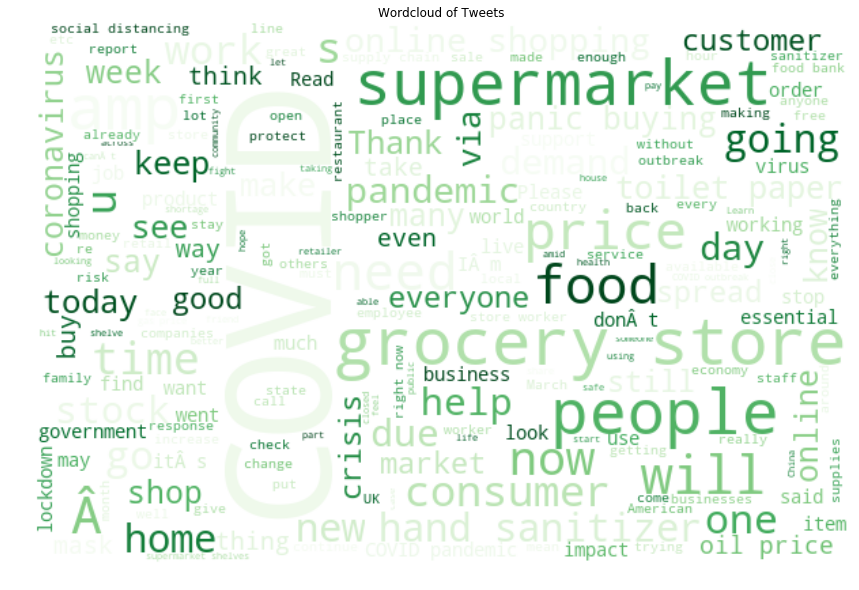

In [16]:
fig, (ax) = plt.subplots(1,1,figsize=[15, 10])
wc = WordCloud(width=600,height=400, background_color='white', colormap="Greens").generate(" ".join(df['OriginalTweet']))

ax.imshow(wc,interpolation='bilinear')
ax.axis('off')
ax.set_title('Wordcloud of Tweets');

In [17]:
from gensim import corpora, models

tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf :
    pprint(doc)
    break

[(0, 1.0)]


## Topic modelling : LDA

In [18]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=5, id2word=dictionary, passes=2, workers=2)

In [19]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.055*"price" + 0.038*"covid" + 0.036*"coronavirus" + 0.034*"https" + 0.019*"supermarket" + 0.016*"sanit" + 0.013*"hand" + 0.008*"toilet" + 0.008*"paper" + 0.007*"peopl"
Topic: 1 
Words: 0.030*"store" + 0.028*"groceri" + 0.024*"covid" + 0.021*"shop" + 0.020*"coronavirus" + 0.018*"peopl" + 0.016*"onlin" + 0.014*"worker" + 0.013*"food" + 0.012*"https"
Topic: 2 
Words: 0.045*"https" + 0.034*"covid" + 0.026*"supermarket" + 0.016*"coronavirus" + 0.015*"store" + 0.012*"shop" + 0.011*"social" + 0.011*"distanc" + 0.011*"peopl" + 0.010*"onlin"
Topic: 3 
Words: 0.072*"https" + 0.058*"coronavirus" + 0.047*"covid" + 0.025*"store" + 0.024*"groceri" + 0.016*"supermarket" + 0.014*"toiletpap" + 0.010*"covid_" + 0.010*"home" + 0.010*"shop"
Topic: 4 
Words: 0.060*"https" + 0.044*"covid" + 0.032*"consum" + 0.023*"food" + 0.021*"coronavirus" + 0.016*"price" + 0.013*"demand" + 0.011*"pandem" + 0.008*"suppli" + 0.008*"sanit"


In [20]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=5, id2word=dictionary, passes=2, workers=4)

for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.010*"hand" + 0.010*"sanit" + 0.010*"shop" + 0.009*"https" + 0.008*"coronavirus" + 0.008*"onlin" + 0.008*"covid" + 0.007*"store" + 0.007*"groceri" + 0.007*"supermarket"
Topic: 1 Word: 0.012*"https" + 0.009*"coronavirus" + 0.008*"covid" + 0.007*"paper" + 0.007*"toilet" + 0.007*"consum" + 0.006*"toiletpap" + 0.006*"scam" + 0.006*"price" + 0.006*"food"
Topic: 2 Word: 0.013*"groceri" + 0.013*"store" + 0.011*"worker" + 0.008*"coronavirus" + 0.008*"supermarket" + 0.008*"covid" + 0.007*"https" + 0.007*"work" + 0.007*"go" + 0.006*"peopl"
Topic: 3 Word: 0.010*"https" + 0.010*"consum" + 0.010*"price" + 0.009*"covid" + 0.008*"food" + 0.007*"demand" + 0.006*"pandem" + 0.006*"coronavirus" + 0.006*"impact" + 0.005*"onlin"
Topic: 4 Word: 0.009*"price" + 0.009*"https" + 0.008*"supermarket" + 0.008*"covid" + 0.007*"coronavirus" + 0.006*"food" + 0.005*"shop" + 0.005*"peopl" + 0.005*"consum" + 0.004*"panic"


In [ ]:
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model_tfidf, data_matrix, vectorizer, mds='tsne')

In [22]:
corpus_tfidf